# Data ETL & EDA

In [69]:
import pandas as pd

# Load the dataset
df = pd.read_csv('movies_dataset.csv') 

C:\Users\ortol\AppData\Local\Temp\ipykernel_4312\2662559053.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_dataset.csv')


In [70]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [71]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


* La descripción parece un poco extraña, parece que los datos necesitan ser normalizados.
* También podemos ver que hay muchos valores faltantes en el conjunto de datos.
* Algunas columnas están anidadas, necesitamos verificar si podemos desanidarlas.
* Vamos a trabajar en estos problemas.


In [72]:
print(df.isnull().sum())

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


 Empecemos a eliminar la página de inicio que estamos seguros de que no vamos a necesitar, veamos qué hacemos con el lema y pertenece_a_colección que también tienen demasiados valores nulos

In [73]:
df.drop('homepage', axis=1, inplace=True)

Ahora, empecemos a trabajar con las columnas anidadadas

In [74]:
import ast


# Función para desanidar listas y diccionarios en una sola columna de manera legible
def desanidar_columna_inteligente(df, columna):
    desanidado = []

    for item in df[columna]:
        if pd.isna(item) or item == '[]':
            desanidado.append('null')
        else:
            try:
                parsed_item = ast.literal_eval(item)
                # Verificar si es una lista de diccionarios
                if isinstance(parsed_item, list) and all(isinstance(i, dict) for i in parsed_item):
                    # Concatenar el campo 'name' de cada diccionario en una sola cadena
                    names = ', '.join([str(i.get('name', '')) for i in parsed_item])
                    desanidado.append(names if names else 'null')
                elif isinstance(parsed_item, dict):  # Caso de un diccionario único
                    name = parsed_item.get('name', 'null')
                    desanidado.append(name)
                else:
                    desanidado.append('null')
            except (ValueError, SyntaxError) as e:
                desanidado.append('null')

    return pd.Series(desanidado, name=columna)

# Lista de columnas anidadas que queremos desanidar
columnas_anidadas = ["belongs_to_collection", "genres", "production_companies"]

# Aplicar desanidación inteligente a cada columna anidada
for columna in columnas_anidadas:
    if columna in df.columns:
        df[columna] = desanidar_columna_inteligente(df, columna)

df.head()

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,"Animation, Comedy, Family",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,null,65000000,"Adventure, Fantasy, Family",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,Grumpy Old Men Collection,0,"Romance, Comedy",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,null,16000000,"Comedy, Drama, Romance",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,Father of the Bride Collection,0,Comedy,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [75]:
df['production_companies'].head()

0                              Pixar Animation Studios
1    TriStar Pictures, Teitler Film, Interscope Com...
2                         Warner Bros., Lancaster Gate
3               Twentieth Century Fox Film Corporation
4           Sandollar Productions, Touchstone Pictures
Name: production_companies, dtype: object

In [76]:
df['spoken_languages'] = desanidar_columna_inteligente(df, 'spoken_languages')
df.head()

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,"Animation, Comedy, Family",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,1995-10-30,373554033.0,81.0,English,Released,NaN,Toy Story,False,7.7,5415.0
1,False,null,65000000,"Adventure, Fantasy, Family",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,1995-12-15,262797249.0,104.0,"English, Français",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,Grumpy Old Men Collection,0,"Romance, Comedy",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,1995-12-22,0.0,101.0,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,null,16000000,"Comedy, Drama, Romance",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,1995-12-22,81452156.0,127.0,English,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,Father of the Bride Collection,0,Comedy,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,1995-02-10,76578911.0,106.0,English,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


Luego de un par de intentos las columnas parecen hacer quedado desanidadas

Vamos a rellenar los valores nulos de revenue y budget con 0 para poder hacer calculos con ellos sin que den error

In [77]:
df['revenue'] = df['revenue'].fillna(0)
df['budget'] = df['budget'].fillna(0)

# Para verificar que se hayan rellenado correctamente, podemos hacer una comprobación:
print("Valores nulos en revenue:", df['revenue'].isnull().sum())
print("Valores nulos en budget:", df['budget'].isnull().sum())

# Ver algunos ejemplos de los datos actualizados
print("\nEjemplos de los datos:")
print(df[['revenue', 'budget']].head())

Valores nulos en revenue: 0
Valores nulos en budget: 0

Ejemplos de los datos:
       revenue    budget
0  373554033.0  30000000
1  262797249.0  65000000
2          0.0         0
3   81452156.0  16000000
4   76578911.0         0


Vamos a descartar las columnas que no tienen release_date ya que no son muchas y nos evitamos el manejo se nulos al trabajar con esta columna que va a ser muy usada

In [78]:
# Primero, veamos cuántos valores nulos hay antes de eliminarlos
print("Cantidad de valores nulos en release_date antes:", df['release_date'].isnull().sum())
print("Cantidad total de filas antes:", len(df))

# Eliminar las filas donde release_date es nulo
df = df.dropna(subset=['release_date'])

# Verificar el resultado
print("\nCantidad de valores nulos en release_date después:", df['release_date'].isnull().sum())
print("Cantidad total de filas después:", len(df))

# Ver algunos ejemplos de las fechas
print("\nEjemplos de fechas:")
print(df['release_date'].head())

Cantidad de valores nulos en release_date antes: 87
Cantidad total de filas antes: 45466

Cantidad de valores nulos en release_date después: 0
Cantidad total de filas después: 45379

Ejemplos de fechas:
0    1995-10-30
1    1995-12-15
2    1995-12-22
3    1995-12-22
4    1995-02-10
Name: release_date, dtype: object


Vamos a formatear esta misma columna y la vamos a pasar a formato datetime y ademas vamos a crear una nueva columna para obtener el año de forma mas directa.

In [80]:
# 1. Convertir a datetime con manejo de errores
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', format='mixed')

# 2. Convertir las fechas al formato deseado
df['release_date'] = df['release_date'].dt.strftime('%Y-%m-%d')

# 3. Crear la columna de año usando Int64 (que permite valores nulos)
df['release_year'] = pd.to_datetime(df['release_date']).dt.year.astype('Int64')

# 4. Verificar los resultados
print("\nEjemplos de fechas procesadas:")
print(df[['release_date', 'release_year']].head())


Ejemplos de fechas procesadas:
  release_date  release_year
0   1995-10-30          1995
1   1995-12-15          1995
2   1995-12-22          1995
3   1995-12-22          1995
4   1995-02-10          1995


Vamos a crear una nueva columna return resultante de la division entre budget y revenue

In [83]:
import numpy as np

# 1. Primero convertimos budget a numérico usando pd.to_numeric
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

# 2. Ahora nos aseguramos que ambas columnas sean float
df['revenue'] = df['revenue'].astype(float)
df['budget'] = df['budget'].astype(float)

# 3. Rellenamos los NaN con 0
df['revenue'] = df['revenue'].fillna(0)
df['budget'] = df['budget'].fillna(0)

# 4. Creamos la columna return
df['return'] = df.apply(lambda row: 
    row['revenue'] / row['budget'] if row['budget'] != 0 
    else 0, axis=1)

# 5. Reemplazamos valores infinitos y NaN con 0
df['return'] = df['return'].replace([np.inf, -np.inf, np.nan], 0)

# 6. Verificamos los resultados
print("Tipos de datos después de la conversión:")
print(df[['revenue', 'budget', 'return']].dtypes)
print("\nPrimeros ejemplos:")
print(df[['revenue', 'budget', 'return']].head())

Tipos de datos después de la conversión:
revenue    float64
budget     float64
return     float64
dtype: object

Primeros ejemplos:
       revenue      budget     return
0  373554033.0  30000000.0  12.451801
1  262797249.0  65000000.0   4.043035
2          0.0         0.0   0.000000
3   81452156.0  16000000.0   5.090760
4   76578911.0         0.0   0.000000


Vamos a eliminar las columnas que no nos interesan para reducir el tamaño del dataset

In [84]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['video', 'imdb_id', 'adult', 'original_title', 'poster_path']

# Eliminar las columnas
df = df.drop(columnas_a_eliminar, axis=1)

# Verificar las columnas restantes
print("Columnas restantes en el dataset:")
print(df.columns.tolist())

Columnas restantes en el dataset:
['belongs_to_collection', 'budget', 'genres', 'id', 'original_language', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count', 'release_year', 'return']



Vamos a guardar el df filtrado en un nuevo archivo csv

In [85]:
df.to_csv('movies_limpio.csv', 
          index=False,
          encoding='utf-8',
          sep=',')

Vamos a trabajar con el otro archivo de créditos ahora

In [86]:
df = pd.read_csv('credits.csv') 

In [87]:
df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [89]:
df.isnull().sum()

cast    0
crew    0
id      0
dtype: int64

In [93]:
df.iloc[0,1]

'[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name\': \'A

Lets convert the cast column into its oun data frame

In [94]:
import json
# Función para expandir el cast en un nuevo DataFrame
def expandir_cast(df):
    registros_cast = []

    for _, row in df.iterrows():
        movie_id = row['id']
        try:
            # Convertir el valor en JSON válido
            cast_list = json.loads(row['cast'].replace("'", '"'))
            for actor in cast_list:
                # Agregar una fila con los datos de interés y excluir `credit_id` y `profile_path`
                registros_cast.append({
                    'movie_id': movie_id,
                    'actor_id': actor.get('id'),
                    'name': actor.get('name'),
                    'character': actor.get('character'),
                    'gender': actor.get('gender'),
                    'order': actor.get('order')
                })
        except (json.JSONDecodeError, TypeError):
            continue  # Omitir si no es posible procesar el JSON

    # Crear un nuevo DataFrame con los registros del cast
    return pd.DataFrame(registros_cast)

# Aplicar la función y crear el DataFrame del cast
df_cast = expandir_cast(df)

# Ver el resultado
print(df_cast)


       movie_id  actor_id             name                     character  \
0         15602      6837   Walter Matthau                   Max Goldman   
1         15602      3151      Jack Lemmon                John Gustafson   
2         15602     13567      Ann-Margret               Ariel Gustafson   
3         15602     16757     Sophia Loren  Maria Sophia Coletta Ragetti   
4         15602       589     Daryl Hannah             Melanie Gustafson   
...         ...       ...              ...                           ...   
63020     30840     29459   Patrick Bergin               Sir Robert Hode   
63021     30840       139      Uma Thurman                   Maid Marian   
63022     30840     18616  David Morrissey                   Little John   
63023     30840       920  Jürgen Prochnow            Sir Miles Folcanet   
63024     30840      1924    Jeroen Krabbé          Baron Roger Daguerre   

       gender  order  
0           2      0  
1           2      1  
2           1     

In [96]:
df_cast.isnull().sum()

movie_id     0
actor_id     0
name         0
character    0
gender       0
order        0
dtype: int64

In [97]:
df_cast.to_csv('movies_cast.csv', 
          index=False,
          encoding='utf-8',
          sep=',')

Lets do the same with the crew column

In [98]:
def expandir_crew(df):
    registros_crew = []

    for _, row in df.iterrows():
        movie_id = row['id']
        try:
            # Convertir el valor en JSON válido
            crew_list = json.loads(row['crew'].replace("'", '"'))
            for miembro in crew_list:
                # Agregar una fila con los datos de interés y excluir `credit_id` y `profile_path`
                registros_crew.append({
                    'movie_id': movie_id,
                    'crew_id': miembro.get('id'),
                    'name': miembro.get('name'),
                    'department': miembro.get('department'),
                    'job': miembro.get('job'),
                    'gender': miembro.get('gender')
                })
        except (json.JSONDecodeError, TypeError):
            continue  # Omitir si no es posible procesar el JSON

    # Crear un nuevo DataFrame con los registros del crew
    return pd.DataFrame(registros_crew)

# Aplicar la función y crear el DataFrame del crew
df_crew = expandir_crew(df)

# Ver el resultado
print(df_crew)

      movie_id  crew_id                 name department           job  gender
0        16420     6210  William Shakespeare    Writing        Writer       2
1        16420    56710        Oliver Parker  Directing      Director       2
2        16420    56710        Oliver Parker    Writing    Adaptation       2
3        31174    33315    Richard Loncraine  Directing      Director       2
4        31174     6210  William Shakespeare    Writing  Theatre Play       2
...        ...      ...                  ...        ...           ...     ...
8330    106807    11523       Georges Méliès  Directing      Director       0
8331     67179    20875          Leo Tolstoy    Writing         Novel       2
8332     67179    24279        Paolo Taviani    Writing    Screenplay       2
8333     67179    24279        Paolo Taviani  Directing      Director       2
8334     67179    24281     Vittorio Taviani  Directing      Director       0

[8335 rows x 6 columns]


In [99]:
df_cast.isnull().sum()

movie_id     0
actor_id     0
name         0
character    0
gender       0
order        0
dtype: int64

In [100]:
df_cast.to_csv('movies_crew.csv', 
          index=False,
          encoding='utf-8',
          sep=',')

Ya con el dataset un poco mas limpio.

Analicemos el archivo de películas que vamos a usar para entrenar el modelo

Vamos a utilizar el data profiling que hace un analicis bastante completo de manera bastante autonoma que nos viene bien para este mvp

In [1]:
import pandas as pd

# Cargar los datos
df = pd.read_csv('movies_limpio.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_19532\52589439.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_limpio.csv')


In [2]:
# Descripción estadística de las columnas relevantes
print(df[['budget', 'revenue', 'return']].describe())

             budget       revenue        return
count  4.537900e+04  4.537900e+04  4.537900e+04
mean   4.232325e+06  1.122936e+07  6.599991e+02
std    1.743932e+07  6.438789e+07  7.469083e+04
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00  0.000000e+00
75%    0.000000e+00  0.000000e+00  0.000000e+00
max    3.800000e+08  2.787965e+09  1.239638e+07


Este dataset tiene una gran cantidad de valores en cero para budget, revenue, y return, lo cual afecta su análisis y distorsiona las métricas generales

Matplotlib is building the font cache; this may take a moment.


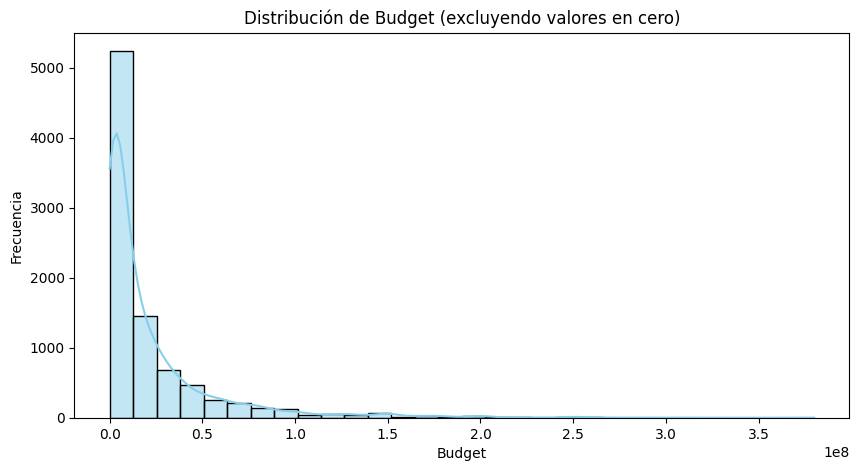

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df[df['budget'] > 0]['budget'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Budget (excluyendo valores en cero)')
plt.xlabel('Budget')
plt.ylabel('Frecuencia')
plt.show()


Esta gráfica sugiere que la mayoría de las películas en el dataset tienen presupuestos relativamente bajos, con algunos valores extremos que corresponden a producciones de alto costo.

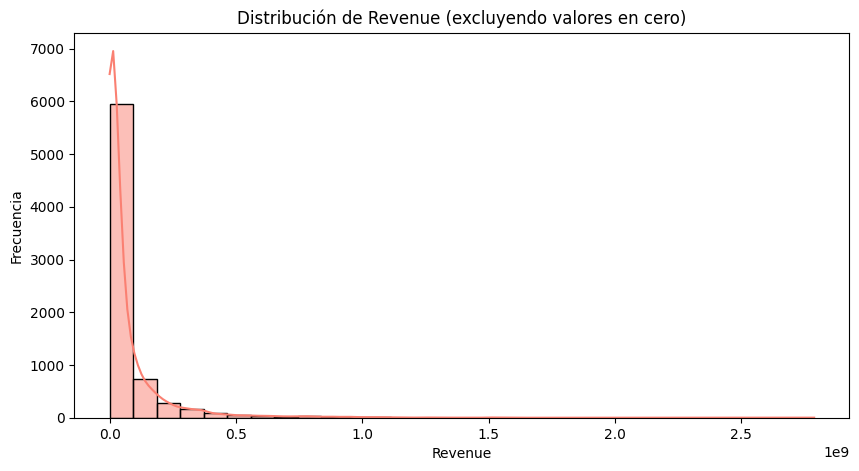

In [4]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df['revenue'] > 0]['revenue'], bins=30, kde=True, color='salmon')
plt.title('Distribución de Revenue (excluyendo valores en cero)')
plt.xlabel('Revenue')
plt.ylabel('Frecuencia')
plt.show()


Este gráfico muestra que la mayoría de las películas generan ingresos (revenue) bajos, similar al patrón observado en el presupuesto (budget). Ambos gráficos tienen una distribución sesgada hacia valores bajos, con pocos outliers de alto valor en producciones de gran escala.

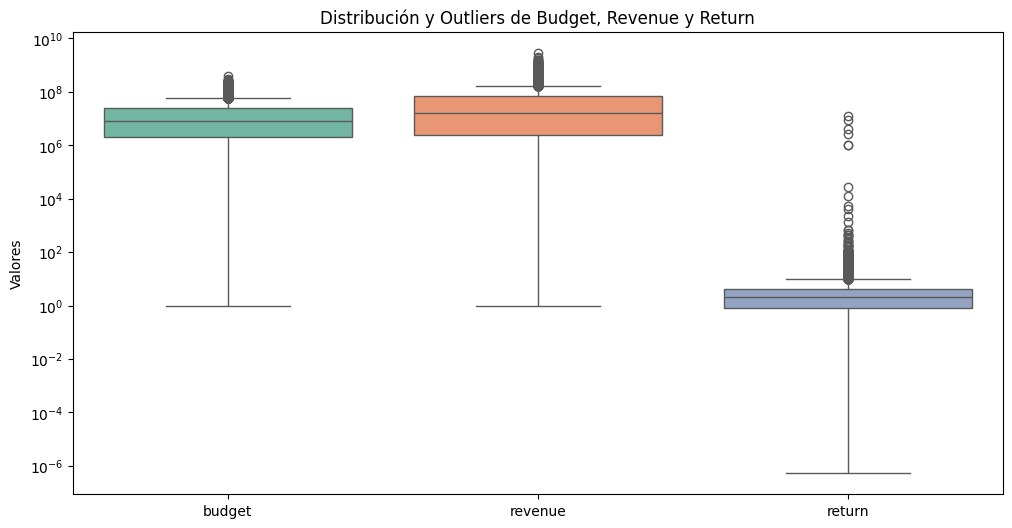

In [6]:
import numpy as np

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['budget', 'revenue', 'return']].replace(0, np.nan), palette='Set2')
plt.title('Distribución y Outliers de Budget, Revenue y Return')
plt.ylabel('Valores')
plt.yscale('log')  # Escala logarítmica para visualizar mejor los outliers
plt.show()


Este gráfico de caja muestra que tanto budget como revenue tienen valores típicos en el rango de millones, con algunos outliers significativos que representan producciones de gran presupuesto e ingresos. La variable return también tiene outliers, aunque su distribución es más dispersa, lo que indica variabilidad en el rendimiento de las inversiones en películas.

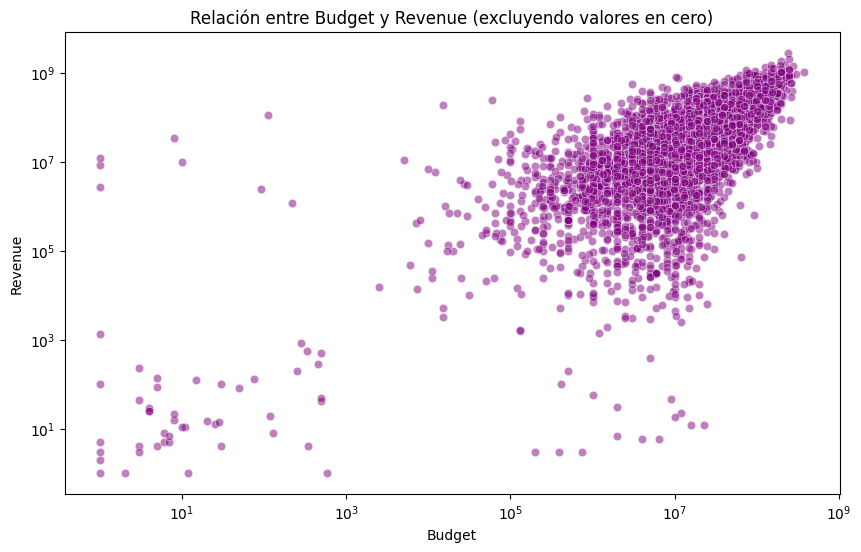

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[(df['budget'] > 0) & (df['revenue'] > 0)], x='budget', y='revenue', alpha=0.5, color='purple')
plt.title('Relación entre Budget y Revenue (excluyendo valores en cero)')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.xscale('log')
plt.yscale('log')
plt.show()


Este gráfico de dispersión muestra una relación positiva entre budget y revenue: a medida que aumenta el presupuesto de una película, generalmente también aumentan los ingresos, aunque con cierta dispersión, indicando variabilidad en el retorno de inversión. Aunque mientras mayor es la inversion menor es la variabilidad.

C:\Users\User\AppData\Local\Temp\ipykernel_19532\2912484067.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=genres, palette='viridis')


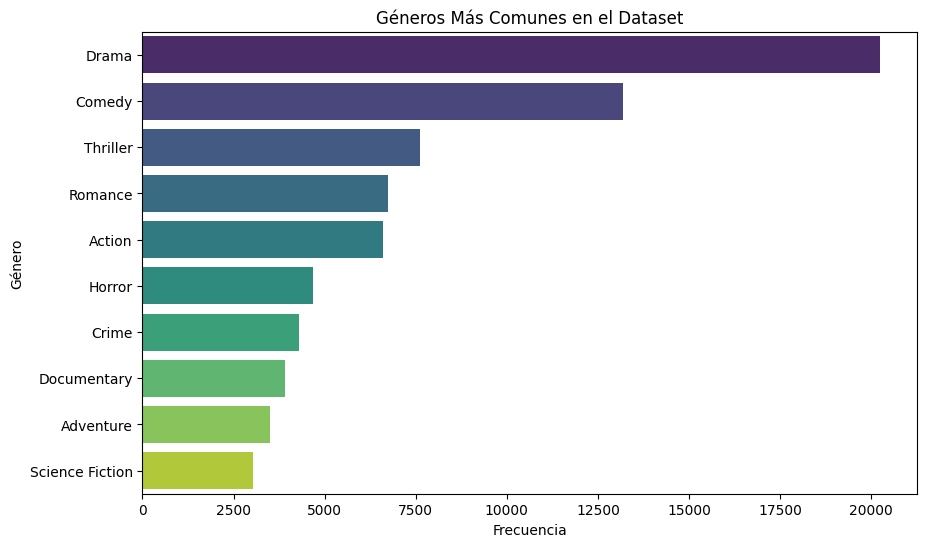

In [9]:
from collections import Counter

# Dividir y contar géneros
all_genres = df['genres'].dropna().str.split(', ')
genre_counts = Counter([genre for genres_list in all_genres for genre in genres_list])
top_genres = genre_counts.most_common(10)
genres, counts = zip(*top_genres)

# Gráfico de barras de los géneros más comunes
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=genres, palette='viridis')
plt.title('Géneros Más Comunes en el Dataset')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.show()

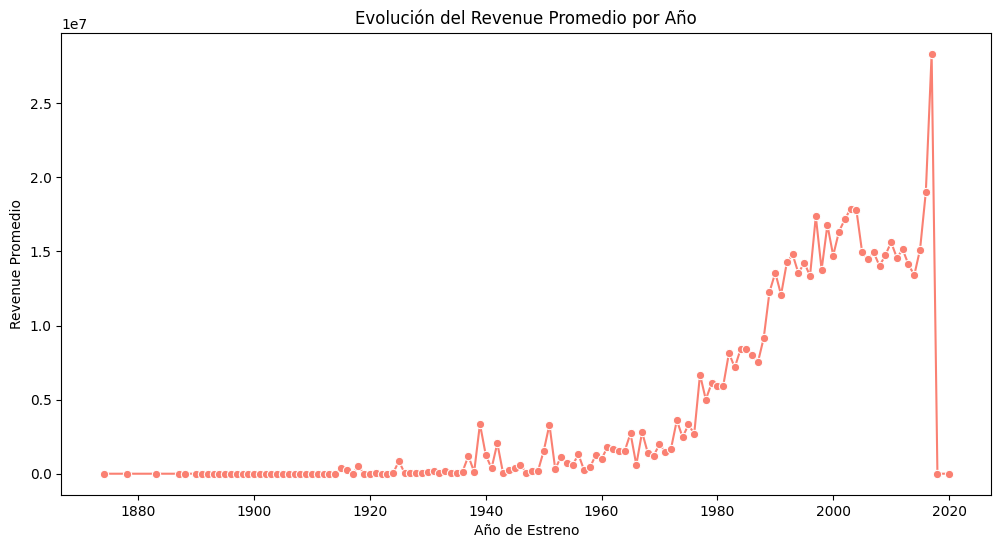

In [10]:
# Asegurarse de que la columna release_year sea numérica
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
average_revenue_by_year = df.groupby('release_year')['revenue'].mean().dropna()

# Gráfico de línea de revenue promedio por año
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_revenue_by_year.index, y=average_revenue_by_year.values, marker='o', color='salmon')
plt.title('Evolución del Revenue Promedio por Año')
plt.xlabel('Año de Estreno')
plt.ylabel('Revenue Promedio')
plt.show()

Este gráfico muestra un aumento constante en el revenue promedio de las películas a lo largo de las décadas, especialmente desde 1970, con un incremento notable hacia los años 2000 y principios de 2010. La caída pronunciada en los años posteriores a 2020 podría indicar datos incompletos para películas recientes o el impacto de eventos globales, como la pandemia, en la industria cinematográfica.

C:\Users\User\AppData\Local\Temp\ipykernel_19532\1847754549.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  revenue_mean = df[df['production_companies'].str.contains(company, na=False)]['revenue'].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_19532\1847754549.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_companies_df, y='Company', x='Average_Revenue', palette='coolwarm')


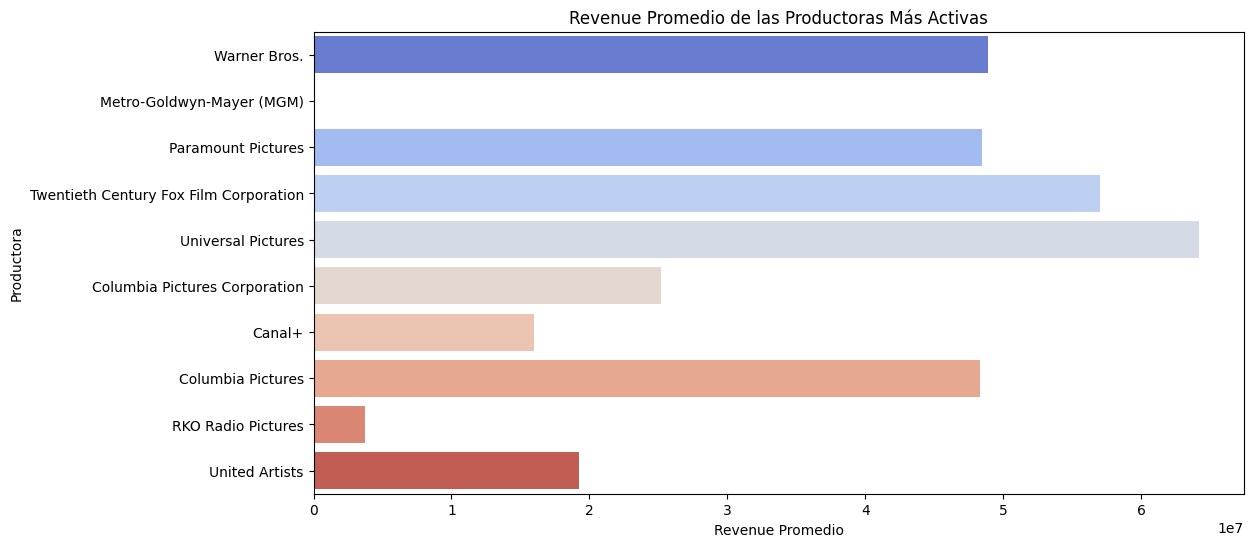

In [12]:
# Dividir y contar las productoras
all_companies = df['production_companies'].dropna().str.split(', ')
company_counts = Counter([company for companies_list in all_companies for company in companies_list])
top_companies = company_counts.most_common(10)
companies, counts = zip(*top_companies)

# Crear DataFrame de las 10 productoras más activas
top_companies_df = pd.DataFrame(top_companies, columns=['Company', 'Count'])

# Calcular el revenue promedio por cada productora en el top 10
average_revenue_by_company = {}
for company in companies:
    revenue_mean = df[df['production_companies'].str.contains(company, na=False)]['revenue'].mean()
    average_revenue_by_company[company] = revenue_mean

# Crear DataFrame para la gráfica
top_companies_df['Average_Revenue'] = top_companies_df['Company'].map(average_revenue_by_company)

# Gráfico de barras para las 10 productoras más activas y su revenue promedio
plt.figure(figsize=(12, 6))
sns.barplot(data=top_companies_df, y='Company', x='Average_Revenue', palette='coolwarm')
plt.title('Revenue Promedio de las Productoras Más Activas')
plt.xlabel('Revenue Promedio')
plt.ylabel('Productora')
plt.show()

### Preparación de datos para el modelo de coseno
 Vamos a pasar las columnas de lenguaje natural y convertirlas en vectores para que el modelo pueda recomendar las películas más similares. Estos se van a guardar en un nuevo archivo para dejarlos precargados en memoria y no tener que generarlos no the fly asi mejoramos la eficiencia.

In [22]:
df = pd.read_csv('movies_limpio.csv')

df['text'] = (
    df['title'].fillna('') + ' ' + 
    df['genres'].fillna('') + ' ' + 
    df['overview'].fillna('') + ' ' + 
    df['tagline'].fillna('')
)

df['text'].head()

C:\Users\User\AppData\Local\Temp\ipykernel_19532\1181438895.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_limpio.csv')


0    Toy Story Animation, Comedy, Family Led by Woo...
1    Jumanji Adventure, Fantasy, Family When siblin...
2    Grumpier Old Men Romance, Comedy A family wedd...
3    Waiting to Exhale Comedy, Drama, Romance Cheat...
4    Father of the Bride Part II Comedy Just when G...
Name: text, dtype: object

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inicializamos el vectorizador TF-IDF, eliminando stopwords (palabras que no agregan valor) en inglés
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Vectorización del texto de la columna unificada
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

Vamos a guardar los vectores recién generados en un nuevo archivo

In [25]:
import pickle

df['title'] = df['title'].str.lower()
# Guarda el DataFrame de IDs y la matriz de vectores en un diccionario
movie_vectors = {
    "titles": df['title'].values,  # array de títulos en minúscula
    "tfidf_matrix": tfidf_matrix   # matriz TF-IDF
}

# Guardar en archivo binario
with open('movie_vectors.pkl', 'wb') as f:
    pickle.dump(movie_vectors, f)

Vamos a verificar que todo esté bien


In [15]:
# Cargar el archivo binario
with open('movie_vectors.pkl', 'rb') as f:
    movie_vectors = pickle.load(f)

# Verifica los datos cargados
print(type(movie_vectors))
print(movie_vectors.keys())  # Debería mostrar 'titles' y 'tfidf_matrix'
print(movie_vectors['titles'][:5])  # Muestra algunos títulos para verificar
print(movie_vectors['tfidf_matrix'].shape)  # Muestra la forma de la matriz de vectores

<class 'dict'>
dict_keys(['titles', 'tfidf_matrix'])
['Toy Story' 'Jumanji' 'Grumpier Old Men' 'Waiting to Exhale'
 'Father of the Bride Part II']
(45379, 82253)


Al desarrollar la funcionalidad de las APIs, nos dimos cuenta de que era más sencillo tener solo un archivo de conjunto de datos. Así que aquí vamos a combinar los 3 conjuntos de datos para hacerlo más fácil de trabajar.

In [5]:
import pandas as pd

# Cargar los archivos originales
df_movies = pd.read_csv('./app/movies_limpio.csv')
df_cast = pd.read_csv('./app/movies_cast.csv')
df_crew = pd.read_csv('./app/movies_crew.csv')

# Convertir las columnas `id` en `df_movies` y `movie_id` en `df_cast` y `df_crew` a tipo string
df_movies = df_movies.rename(columns={"id": "movie_id"})  # Renombrar 'id' a 'movie_id' para que coincida
df_movies['movie_id'] = df_movies['movie_id'].astype(str)
df_cast['movie_id'] = df_cast['movie_id'].astype(str)
df_crew['movie_id'] = df_crew['movie_id'].astype(str)

# Agrupar y concatenar los nombres de los actores y directores
df_cast_grouped = df_cast.groupby('movie_id')['name'].apply(lambda x: ', '.join(x)).reset_index()
df_crew_grouped = df_crew.groupby('movie_id')['name'].apply(lambda x: ', '.join(x)).reset_index()

# Merge de los datos
df_merged = df_movies.merge(df_cast_grouped, on="movie_id", how="left")
df_merged = df_merged.merge(df_crew_grouped, on="movie_id", how="left")

# Renombrar las columnas para claridad
df_merged = df_merged.rename(columns={"name_x": "cast", "name_y": "crew"})

# Guardar el resultado en un nuevo CSV
df_merged.to_csv('movies_combined.csv', index=False)

C:\Users\User\AppData\Local\Temp\ipykernel_4144\318541524.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movies = pd.read_csv('./app/movies_limpio.csv')
